# **Determine The Status Of Loan**

- ## **Building A Model**

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt    
import seaborn as sns
%matplotlib inline

- #### **Reading the Datasets**

In [2]:
# Reading Training Dataset
Data = pd.read_csv(r'Data\TrainData.csv')

# Reading Testing Dataset
Test_Data = pd.read_csv(r'Data\TestData.csv')

# Check Shape of datasets
print('Size of Training Data',Data.shape)
print('Size of Testing Data',Test_Data.shape)

Size of Training Data (614, 13)
Size of Testing Data (367, 12)


In [3]:
# Check the Head of Training dataset
Data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# Check the Data types of Training Data
Data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

- #### **Descriptive Statistics**

In [5]:
# Descriptive Analysis of Numerical Data
Data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
# Descriptive Analysis of Categorical Data
Data.describe(include='object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP002194,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


- ### **Data Cleaning**

In [7]:
# Checking the Null values present in Training Data
Data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

- #### **Imputing Missing Values**

In [8]:
# Imputing Missing Values in Data
# Lets Create the Function for Imputing Missing values 
# So we can use it for Test Data as well

In [9]:
# Function for Imputing Missing Values

def Impute_Missing_Val(DataFrame):
    # Imputing Missing values with Mode
    DataFrame['Gender'].fillna(DataFrame['Gender'].mode()[0],inplace=True)
    DataFrame['Married'].fillna(DataFrame['Married'].mode()[0],inplace=True)
    DataFrame['Self_Employed'].fillna(DataFrame['Self_Employed'].mode()[0],inplace=True)
    DataFrame['Dependents'].fillna(DataFrame['Dependents'].mode()[0],inplace=True)

    # Imputing Missing values with Median
    DataFrame['LoanAmount'].fillna(DataFrame['LoanAmount'].median(),inplace=True)
    DataFrame['Loan_Amount_Term'].fillna(DataFrame['Loan_Amount_Term'].median(),inplace=True)
    DataFrame['Credit_History'].fillna(DataFrame['Credit_History'].median(),inplace=True)  
    return Data

In [10]:
# Lets Impute Missing values in Training Data using Function
Impute_Missing_Val(Data)

# Check if Missing values are present in Data
Data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

- #### **Check & Remove Outliers**

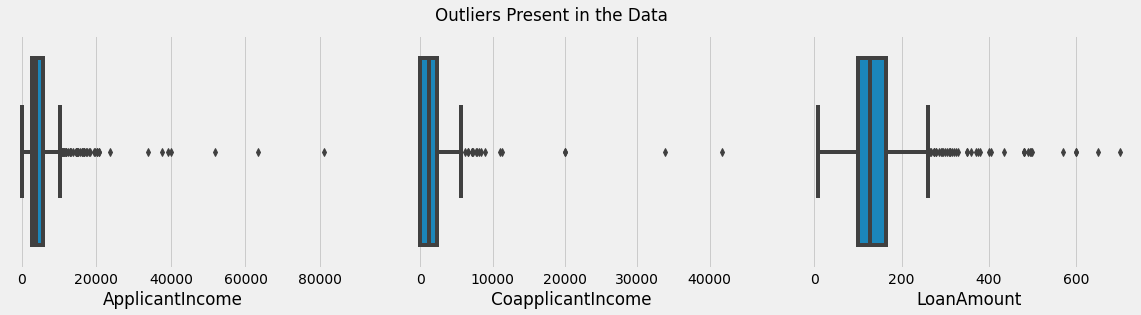

In [11]:
# Lets See Outliers Using Boxplot

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

# visualize the Outliers using boxplot
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (18,4)

plt.subplot(1,3,1)
sns.boxplot(Data['ApplicantIncome'])

plt.subplot(1,3,2)
sns.boxplot(Data['CoapplicantIncome'])

plt.subplot(1,3,3)
sns.boxplot(Data['LoanAmount'])

plt.suptitle('Outliers Present in the Data')
plt.show()

In [12]:
# Removing Outliers

# Check Shape of data before removing outliers
print('Shape of Data before removing outliers:',Data.shape)

# Remove the customers having more than 25000 income
Data=Data[Data['ApplicantIncome']<25000]

# Remove the customers having more than 10000 coapplicant income
Data=Data[Data['CoapplicantIncome']<10000]

# Remove the customers having more than 400 loan amount
Data=Data[Data['LoanAmount']<400]

# check the shape of data after removing outliers
print('Shape of Data after removing outliers:',Data.shape)

Shape of Data before removing outliers: (614, 13)
Shape of Data after removing outliers: (590, 13)


- ### **Univariate Analysis**

- #### **Univariate Analysis of Categorical Data**

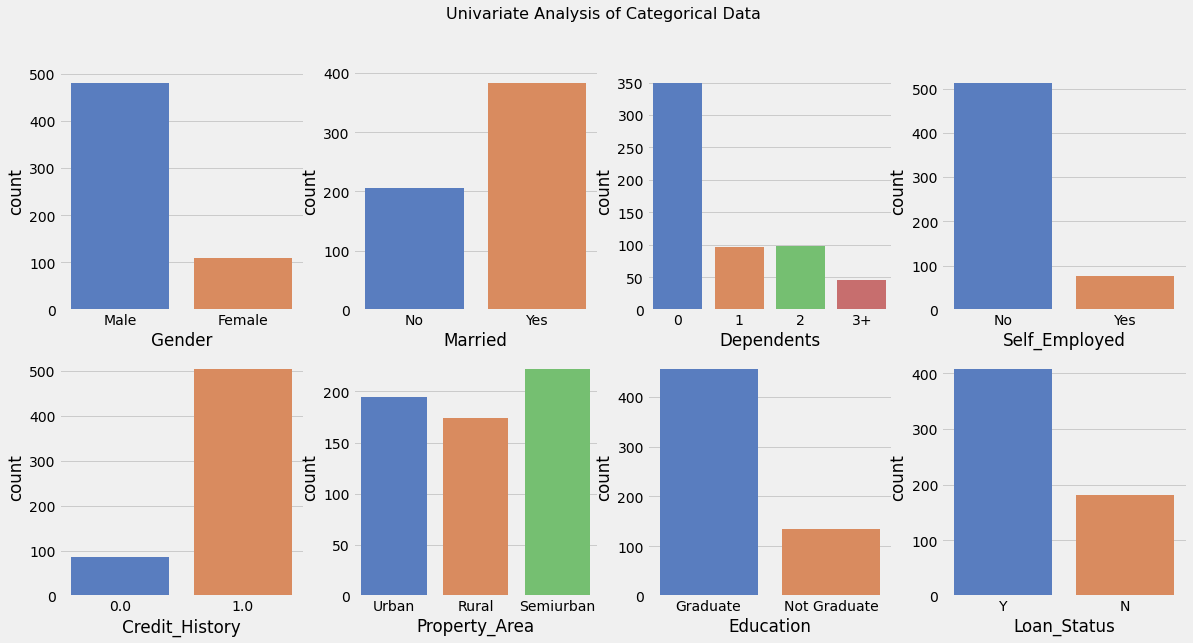

In [13]:
# Univariate Analysis of Categorical Data

# Lets plot the chart using countplot method
plt.rcParams['figure.figsize'] = (18,9)

plt.subplot(2, 4, 1)
sns.countplot(Data['Gender'], palette = 'muted')

plt.subplot(2, 4, 2)
sns.countplot(Data['Married'], palette = 'muted')

plt.subplot(2, 4, 3)
sns.countplot(Data['Dependents'], palette = 'muted')

plt.subplot(2, 4, 4)
sns.countplot(Data['Self_Employed'], palette = 'muted')

plt.subplot(2, 4, 5)
sns.countplot(Data['Credit_History'], palette = 'muted')

plt.subplot(2, 4, 6)
sns.countplot(Data['Property_Area'], palette = 'muted')

plt.subplot(2, 4, 7)
sns.countplot(Data['Education'], palette = 'muted')

plt.subplot(2, 4, 8)
sns.countplot(Data['Loan_Status'], palette = 'muted')

plt.suptitle('Univariate Analysis of Categorical Data', fontsize=16)
plt.show()

- #### **Univariate Analysis of Numerical Data**

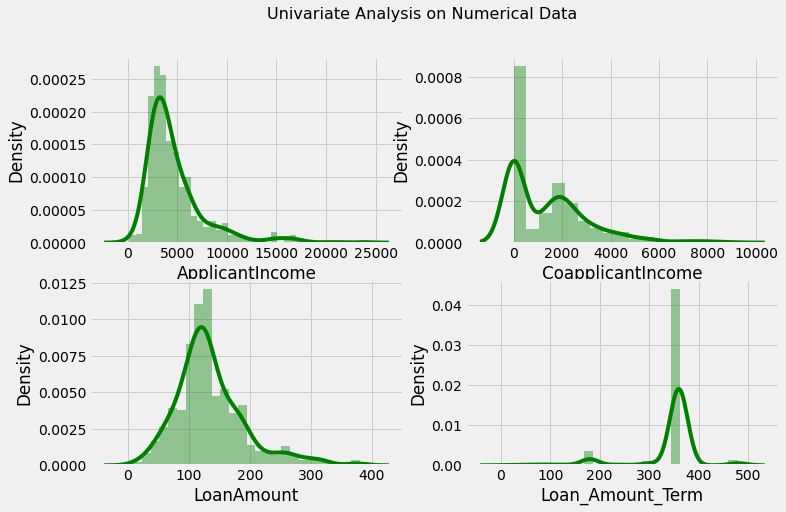

In [14]:
# Univariate Analysis of Numerical data
plt.rcParams['figure.figsize'] = (11,7)

plt.subplot(2,2,1)
sns.distplot(Data['ApplicantIncome'], color = 'green')

plt.subplot(2,2,2)
sns.distplot(Data['CoapplicantIncome'], color = 'green')

plt.subplot(2,2,3)
sns.distplot(Data['LoanAmount'], color = 'green')

plt.subplot(2,2,4)
sns.distplot(Data['Loan_Amount_Term'], color = 'green')

plt.suptitle('Univariate Analysis on Numerical Data', fontsize=16)
plt.show()

In [15]:
# Lets measure the skewness of Data
Data.skew()

ApplicantIncome      2.344116
CoapplicantIncome    1.355108
LoanAmount           1.165654
Loan_Amount_Term    -2.448984
Credit_History      -2.012881
dtype: float64

- ### **Bivariate Data Analysis**

- #### **Bivariate Analysis of Numerical Data**

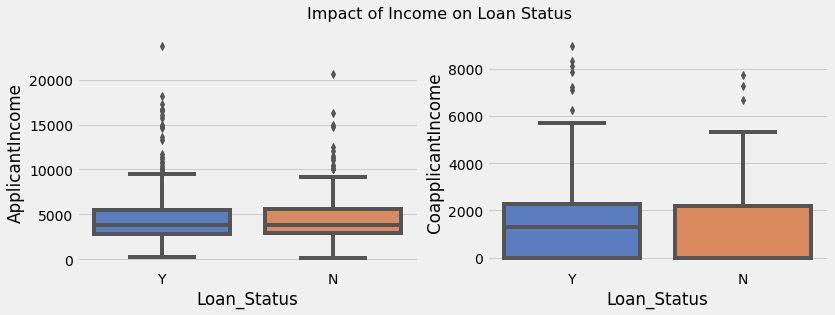

In [16]:
# Check the Impact of Income of Applicant and Co-applicant on Loan Status

# Plot the chart using violinplot
plt.rcParams['figure.figsize'] = (12,4)

plt.subplot(1, 2, 1)
sns.boxplot(x='Loan_Status', y='ApplicantIncome',data=Data, palette='muted')

plt.subplot(1, 2, 2)
sns.boxplot(x='Loan_Status', y='CoapplicantIncome',data=Data,palette='muted')

plt.suptitle('Impact of Income on Loan Status\n', fontsize = 16)
plt.show()

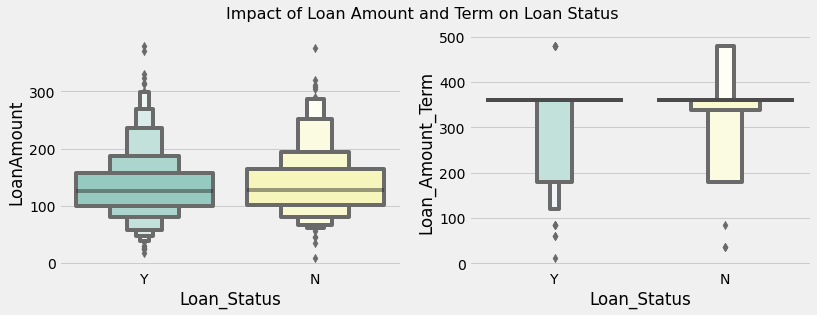

In [17]:
# Checks the Impact of Loan Amount and Loan Amount Term on Loan Status

plt.rcParams['figure.figsize'] = (12, 4)

plt.subplot(1, 2, 1)
sns.boxenplot(x='Loan_Status',y='LoanAmount', data=Data, palette='Set3')

plt.subplot(1, 2, 2)
sns.boxenplot(x='Loan_Status',y='Loan_Amount_Term', data=Data, palette='Set3')

plt.suptitle('Impact of Loan Amount and Term on Loan Status\n', fontsize = 16)
plt.show()

- #### **Bivariate Analysis of Categorical Data**

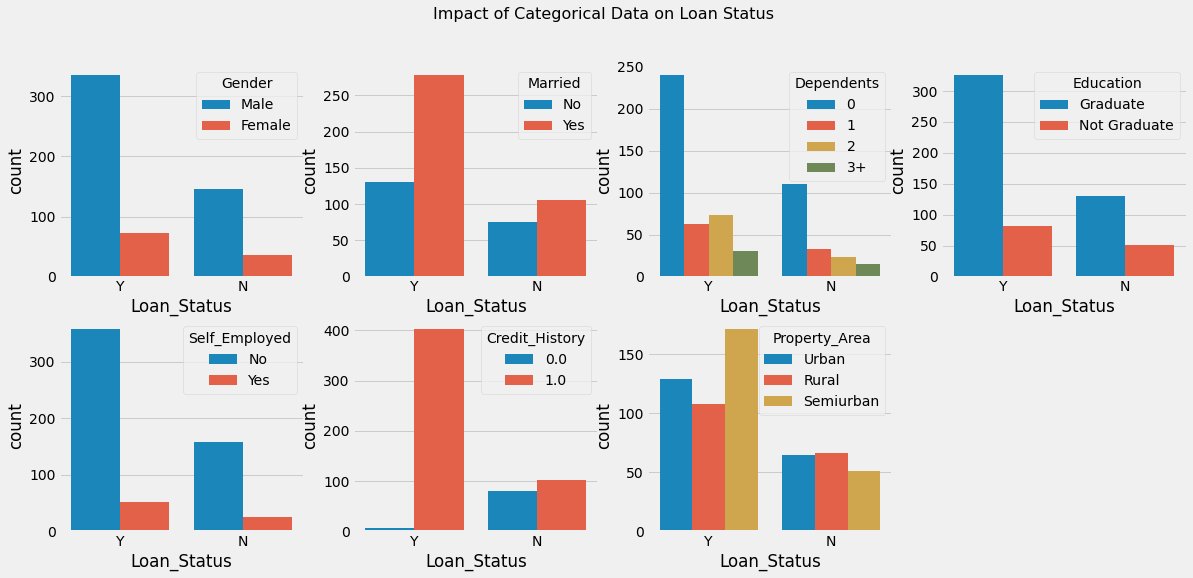

In [18]:
# Compare all the Categories with respect to the Loan Status to understand the Overall Impact

# plot the chart using countplot 
plt.rcParams['figure.figsize'] = (18,8)

plt.subplot(2,4,1)
sns.countplot(x="Loan_Status",hue="Gender", data=Data, order=['Y','N'])

plt.subplot(2,4,2)
sns.countplot(x="Loan_Status",hue="Married", data=Data, order=['Y','N'])

plt.subplot(2,4,3)
sns.countplot(x="Loan_Status",hue="Dependents", data=Data,order=['Y','N'])

plt.subplot(2,4,4)
sns.countplot(x="Loan_Status",hue="Education", data=Data,order=['Y','N'])

plt.subplot(2,4,5)
sns.countplot(x="Loan_Status",hue="Self_Employed", data=Data,order=['Y','N'])

plt.subplot(2,4,6)
sns.countplot(x="Loan_Status",hue="Credit_History", data=Data,order=['Y','N'])

plt.subplot(2,4,7)
sns.countplot(x="Loan_Status",hue="Property_Area", data=Data,order=['Y','N'])

plt.suptitle('Impact of Categorical Data on Loan Status', fontsize=16)
plt.show()


- ### **Data Preparation**

In [19]:
# Preparation of data for ML model

# check the columns which are of object type
print(Data.select_dtypes('object').columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [20]:
# Lets Drop the Loan_ID Column it has no relation with Loan Status
Data.drop('Loan_ID',axis=1,inplace=True)

- #### **Data Encoding**

In [21]:
# lets Encode the Values (Change the dtype of object to numeric)

# before converting check the Unique Values of categorical data
print('Unique Values of Gender are',Data['Gender'].unique())
print('Unique Values of Married are',Data['Married'].unique())
print('Unique Values of Dependents are',Data['Dependents'].unique())
print('Unique Values of Education are',Data['Education'].unique())
print('Unique Values of Self_Employed are',Data['Self_Employed'].unique())
print('Unique Values of Property_Area are',Data['Property_Area'].unique())
print('Unique Values of Loan_Status are',Data['Loan_Status'].unique())

Unique Values of Gender are ['Male' 'Female']
Unique Values of Married are ['No' 'Yes']
Unique Values of Dependents are ['0' '1' '2' '3+']
Unique Values of Education are ['Graduate' 'Not Graduate']
Unique Values of Self_Employed are ['No' 'Yes']
Unique Values of Property_Area are ['Urban' 'Rural' 'Semiurban']
Unique Values of Loan_Status are ['Y' 'N']


In [22]:
# Now we know the unique values of of categorical data 
# Lets Convert Categorical Data to Numeric Data
# Lets Create the function for conversion of data to numeric
# So We can use it for test data as well

In [23]:
# Function for Numeric Conversiton

def Numeric_conversion(DataFrame):
    DataFrame['Gender'].replace(('Male','Female'),(1,0),inplace=True)
    DataFrame['Married'].replace(('Yes','No'),(1,0),inplace=True)
    DataFrame['Education'].replace(('Graduate','Not Graduate'),(1,0),inplace=True)
    DataFrame['Self_Employed'].replace(('Yes','No'),(1,0),inplace=True)
    
    # Urban and Semi Urban Property have very similar Impact on Loan Status, so, we will merge them together
    DataFrame['Property_Area'].replace(('Urban','Semiurban','Rural'),(1,1,0),inplace=True)
    
    # As seen above that apart from 0 dependents, all are similar hence, we merge them to avoid any confusion
    DataFrame['Dependents'].replace(('0','1','2','3+'),(0,1,1,1),inplace=True)
    return DataFrame

In [24]:
# Test Data isn't contain Loan_Status column So we put it outside of function
Data['Loan_Status'].replace(('Y','N'),(1,0),inplace=True)

In [25]:
# convert Categorical Data with Numeric using Function
Numeric_conversion(Data)

# Check whether there are any object type variable
Data.select_dtypes('object').columns

Index([], dtype='object')

- #### **Transform Data & Remvoe Skewness**

In [26]:
# As we see in Univriate Data Analysis Data is Highly Skewed.
# It can add bias to the data so lets remove it

# Apply Sqare Root transformation and remove Skewness
Data= np.sqrt(Data)

In [27]:
# Check the head of DataSet
Data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,1.0,0.0,76.478755,0.000000,11.313708,18.973666,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,0.0,67.697858,38.832976,11.313708,18.973666,1.0,0.0,0.0
2,1.0,1.0,0.0,1.0,1.0,54.772256,0.000000,8.124038,18.973666,1.0,1.0,1.0
3,1.0,1.0,0.0,0.0,0.0,50.823223,48.559242,10.954451,18.973666,1.0,1.0,1.0
4,1.0,0.0,0.0,1.0,0.0,77.459667,0.000000,11.874342,18.973666,1.0,1.0,1.0


- #### **Set Target Column**

In [28]:
# Split the Target column from the Data
X = Data.drop(['Loan_Status'],axis=1)
Y = Data['Loan_Status']

# Check the Shape of X and Y
print('Shape of X:', X.shape)
print('Shape of Y:', Y.shape)

Shape of X: (590, 11)
Shape of Y: (590,)


- #### **Resambling Data**

In [29]:
# It is very important to resample the data, as the Target class is Highly imbalanced.
# Here We are going to use Over Sampling Technique to resample the data.

# Import the SMOTE algorithm to do the same.
from imblearn.over_sampling import SMOTE
x_res, y_res = SMOTE().fit_resample(X, Y)

# Check Shape of X and Y after resampling it
print('Shape of X:',x_res.shape)
print('Shape of X:',y_res.shape)
print('\n')
# Check the value counts of target variable
print("Before Resambling :")
print(Y.value_counts())
print("\n After Resambling :")
print(y_res.value_counts())

Shape of X: (816, 11)
Shape of X: (816,)


Before Resambling :
1.0    408
0.0    182
Name: Loan_Status, dtype: int64

 After Resambling :
0.0    408
1.0    408
Name: Loan_Status, dtype: int64


- #### **Data Spliting**

In [30]:
# Split the Data for Training Model and Testing Model
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_res,y_res, test_size=0.20,
                                                    random_state=0,shuffle= True, stratify=y_res)

print("Shape of the x Train :", x_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the x Test :", x_test.shape)
print("Shape of the y Test :", y_test.shape)

Shape of the x Train : (652, 11)
Shape of the y Train : (652,)
Shape of the x Test : (164, 11)
Shape of the y Test : (164,)


- ### **Machine Learning Model**

In [31]:
# Apply Gradient Boosting Classifier
# Import Grdient Boosting Classifier from sklearn
from sklearn.ensemble import GradientBoostingClassifier

# Create  ML Model and fit the training data
GBC = GradientBoostingClassifier(n_estimators=80,random_state=75)
GBC.fit(x_train, y_train)

# Predict Output and Store it 
y_pred = GBC.predict(x_test)

In [32]:
# Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy : %s '%'{0:.2%}'.format(accuracy_score(y_test, y_pred)))

Accuracy : 87.80% 


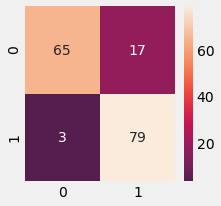

In [33]:
# Confusion Matrix

# Analyze the Performance of Gradient Boosting using Confusion matrix
from sklearn.metrics import confusion_matrix
Conf_Matrix = confusion_matrix(y_test, y_pred)

# Visualize the Confusion Matrix
plt.rcParams['figure.figsize'] = (3,3)
sns.heatmap(Conf_Matrix, annot = True, fmt = '.8g',center=30,cmap="rocket")
plt.show()

In [34]:
# Check the Classification report for performance analysis

from sklearn.metrics import  classification_report
Class_Report = classification_report(y_test, y_pred)
print(Class_Report)

              precision    recall  f1-score   support

         0.0       0.96      0.79      0.87        82
         1.0       0.82      0.96      0.89        82

    accuracy                           0.88       164
   macro avg       0.89      0.88      0.88       164
weighted avg       0.89      0.88      0.88       164



In [35]:
# Cross Validation

# import cross validation module
from sklearn.model_selection import cross_val_score

scores = cross_val_score(GBC, x_train, y_train, cv=10)
print(scores)
print('\n Cross-Validation Score :%s '%'{0:.2%}'.format(scores.mean()))


[0.78787879 0.8030303  0.87692308 0.84615385 0.86153846 0.75384615
 0.87692308 0.78461538 0.8        0.86153846]

 Cross-Validation Score :82.52% 


- ## **Predict Loan Status of Test Data**

In [36]:
# Check the Test Dataset

# Check the Shape
print('Shape is ',Test_Data.shape)

# Check if the Null Values are present
print('Null Values are :',Test_Data.isnull().sum().sum())

# Check Head of dataset
Test_Data.head()

Shape is  (367, 12)
Null Values are : 84


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [37]:
# Impute Missing Values using function which was created earlier
Impute_Missing_Val(Test_Data)
print('Null Values are:',Test_Data.isnull().sum().sum())

# Convert To Numeric Values using function which was created earlier
Numeric_conversion(Test_Data)
print('Object Data Type:',Data.select_dtypes('object').columns)

# Store Loan ID
loan_id=Test_Data['Loan_ID']

# Test Data Transformation
Test_Data = np.sqrt(Test_Data.drop('Loan_ID',axis=1))


Null Values are: 0
Object Data Type: Index([], dtype='object')


In [38]:
# Predict Target Variable and Store it
result = GBC.predict(Test_Data)

# Convert to pandas DataFrame
result=pd.DataFrame(result,columns={'Loan_Status'})

In [39]:
# Replace the Values of 1 and 0 by Y and N
result['Loan_Status'].replace((1, 0),('Y', 'N'),inplace=True)

# Set Index as Loan_ID which was stored in loan_id earlier
result.set_index(loan_id, inplace=True)

# Check the Head of Data
result.head()

,Loan_Status
Loan_ID,
LP001015,Y
LP001022,Y
LP001031,Y
LP001035,Y
LP001051,Y


- ### **Store The Result**

In [40]:
# Store the Final result
result.to_csv(r'Output\Result.csv')